https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction


In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

# Import

python 3.10 
seaborn 
scipy==1.10.1 
numpy==1.23.5 
pandas==2.0.3

In [ ]:
# ! pip install  seaborn scipy==1.10.1 numpy==1.23.5 pandas==2.0.3

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PD Setting


In [ ]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# Load Data

We can see that the amount of data is huge.

In [138]:
#load data
train_path ="./data/train.csv"
test_path="./data/test.csv"
train_data = pd.read_csv(train_path)
test_data =pd.read_csv(test_path)
print('train data size:',train_data.shape)
print('predict data size:',test_data.shape)

train data size: (595212, 59)
predict data size: (892816, 58)


# EDA

### View basic data information

In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).

In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
 
Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
 


In [141]:
display(train_data.columns)


Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'], dtype='object')

In [140]:
train_data.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
CAT_COLS = []
BIN_COLS = []
FLOAT_COLS = []
INT_COLS = []
DROP_COLS =[]
MISSING_COLS =[]
RATIO = 0


### Check missing values 


Values of -1 indicate that the feature was missing from the observation, There are no other missing values

In [ ]:
missing_values = train_data.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)



### Check the proportion of missing values.

In [179]:
print('***data missing num***')

for col in train_data.columns:
    m = train_data[col].isin([-1]).sum()
    if m>0:
        missing_ratio = m / len(train_data)
        print(col,':',m,'--' ,f'{missing_ratio:.4f}')
        MISSING_COLS.append(col)

print('MISSING_COLS:',len(MISSING_COLS))
        

***data missing num***
MISSING_COLS: 11


Replace all -1 values with Nan

In [144]:
for col in MISSING_COLS:
    train_data[col] = train_data[col].replace(-1, np.nan)

In [ ]:


missing_df = train_data.isnull()

# Calculate the proportion of common missing features for each pair of features
missing_corr = pd.DataFrame(index=missing_df.columns, columns=missing_df.columns)

for col1 in missing_df.columns:
    for col2 in missing_df.columns:
        if col1 == col2:
            missing_corr.loc[col1, col2] = 1  
            both_missing = ((missing_df[col1]) & (missing_df[col2])).sum()
            total_non_missing = len(train_data) - ((~missing_df[col1]) & (~missing_df[col2])).sum()
            if total_non_missing > 0:
                ratio = both_missing / total_non_missing
            else:
                ratio = 0
            missing_corr.loc[col1, col2] = ratio

print(missing_corr)

                 id target ps_ind_01 ps_ind_02_cat ps_ind_03 ps_ind_04_cat ps_ind_05_cat ps_ind_06_bin ps_ind_07_bin ps_ind_08_bin ps_ind_09_bin ps_ind_10_bin ps_ind_11_bin ps_ind_12_bin ps_ind_13_bin ps_ind_14 ps_ind_15 ps_ind_16_bin ps_ind_17_bin ps_ind_18_bin ps_reg_01 ps_reg_02 ps_reg_03 ps_car_01_cat ps_car_02_cat ps_car_03_cat ps_car_04_cat ps_car_05_cat ps_car_06_cat ps_car_07_cat ps_car_08_cat ps_car_09_cat ps_car_10_cat ps_car_11_cat ps_car_11 ps_car_12 ps_car_13 ps_car_14 ps_car_15 ps_calc_01 ps_calc_02 ps_calc_03 ps_calc_04 ps_calc_05 ps_calc_06 ps_calc_07 ps_calc_08 ps_calc_09 ps_calc_10 ps_calc_11 ps_calc_12 ps_calc_13 ps_calc_14 ps_calc_15_bin ps_calc_16_bin ps_calc_17_bin ps_calc_18_bin ps_calc_19_bin ps_calc_20_bin
id                1      0         0           0.0         0           0.0           0.0             0             0             0             0             0             0             0             0         0         0             0             0           

When one feature is missing, there is a high probability that another is missing，It shows that there is some correlation between these two characteristics

| feature | feature | missing_corr |
| --- | --- | --- |
| ps_ind_02_cat | ps_ind_04_cat | 0.359091 |
| ps_ind_02_cat | ps_car_01_cat | 0.334711  |
| ps_ind_04_cat | ps_car_01_cat | 0.711712 |
| ps_ind_05_cat | ps_car_07_cat | 0.465435  |
| ps_car_05_cat  | ps_car_03_cat  |0.647878  |

### Counts the number of distinct values (unique values) for each column 

In [146]:
train_data.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          4
ps_ind_03             12
ps_ind_04_cat          2
ps_ind_05_cat          7
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5012
ps_car_01_cat         12
ps_car_02_cat          2
ps_car_03_cat          2
ps_car_04_cat         10
ps_car_05_cat          2
ps_car_06_cat         18
ps_car_07_cat          2
ps_car_08_cat          2
ps_car_09_cat          5
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              4
ps_car_12            183
ps_car_13          70482
ps_car_14            849
ps_car_15             15
ps_calc_01            10


The target columns signifies whether or not a claim was filed for that policy holder.This is a binary problem.

In [147]:
col_name = 'target'
train_data[col_name].unique()

array([0, 1], dtype=int64)

The distribution of categories is very uneven:

* Category 0 accounts for the vast majority
* Category 1 accounts for only a small percentage

In [148]:
train_data['target'].value_counts(normalize=True)*100

target
0    96.355248
1     3.644752
Name: proportion, dtype: float64

### Undersampling operation is used to deal with class imbalance

In [ ]:

df_majority = train_data[train_data['target'] == 0]
df_minority = train_data[train_data['target'] == 1]
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
train_data = pd.concat([df_majority_downsampled, df_minority], axis=0)

In [150]:
train_data['target'].value_counts(normalize=True)
print(train_data.shape)

(43388, 59)


In [180]:
#Distinguish between numerical and discrete features
feature = [i for i in train_data.columns if i not in ['target','id']]

for i in feature:
    if 'cat' in i :
        CAT_COLS.append(i) 
    elif 'bin' in i:
        BIN_COLS.append(i)
    elif 'cat' not in i and 'bin' not in i:
        if train_data[i].dtype == 'float64':
            FLOAT_COLS.append(i)
        elif train_data[i].dtype == 'int64':
            INT_COLS.append(i)
        

print('CAT_COLS:',CAT_COLS)
print('FLOAT_COLS:',FLOAT_COLS)
print('INT_COLS:',INT_COLS)

CAT_COLS: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'pair_miss_ps_ind_02_cat_ps_ind_04_cat', 'pair_miss_ps_ind_02_cat_ps_car_01_cat', 'pair_miss_ps_ind_04_cat_ps_car_01_cat', 'pair_miss_ps_ind_05_cat_ps_car_07_cat', 'pair_miss_ps_car_05_cat_ps_car_03_cat']
FLOAT_COLS: ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
INT_COLS: ['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_calc_05',

### View Distribution of each type of data

In [ ]:

def ViewCategoricalData(data, cat_cols):
    f = pd.melt(data, id_vars=['target'], value_vars=cat_cols)
    g = sns.FacetGrid(f, col="feature", hue="target", col_wrap=3, sharex=False, sharey=False)
    g = g.map(sns.countplot, "value", alpha=0.6).add_legend()

    for ax in g.axes.flat:
        labels = ax.get_xticklabels()
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45)

    plt.show()


def ViewContinuousData(data, num_cols):
    f = pd.melt(data, id_vars=['target'], value_vars=num_cols)
    g = sns.FacetGrid(f, col="feature", hue="target", col_wrap=3, sharex=False, sharey=False)
    g = g.map(sns.kdeplot, "value", alpha=0.6).add_legend()

c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


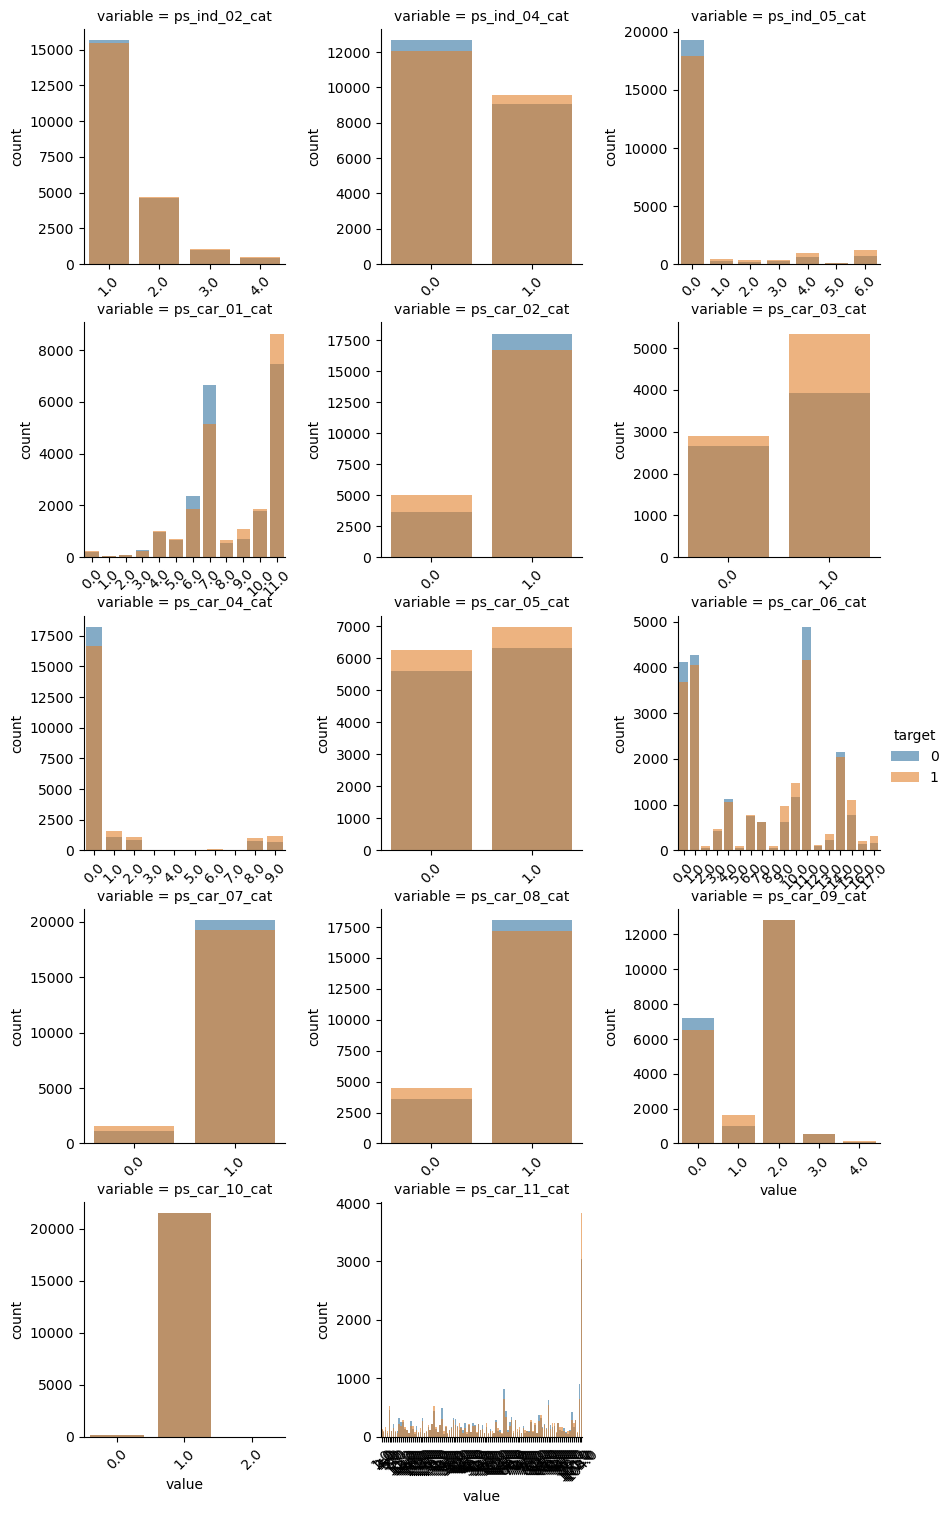

In [153]:
ViewCategoricalData(train_data, CAT_COLS)

c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


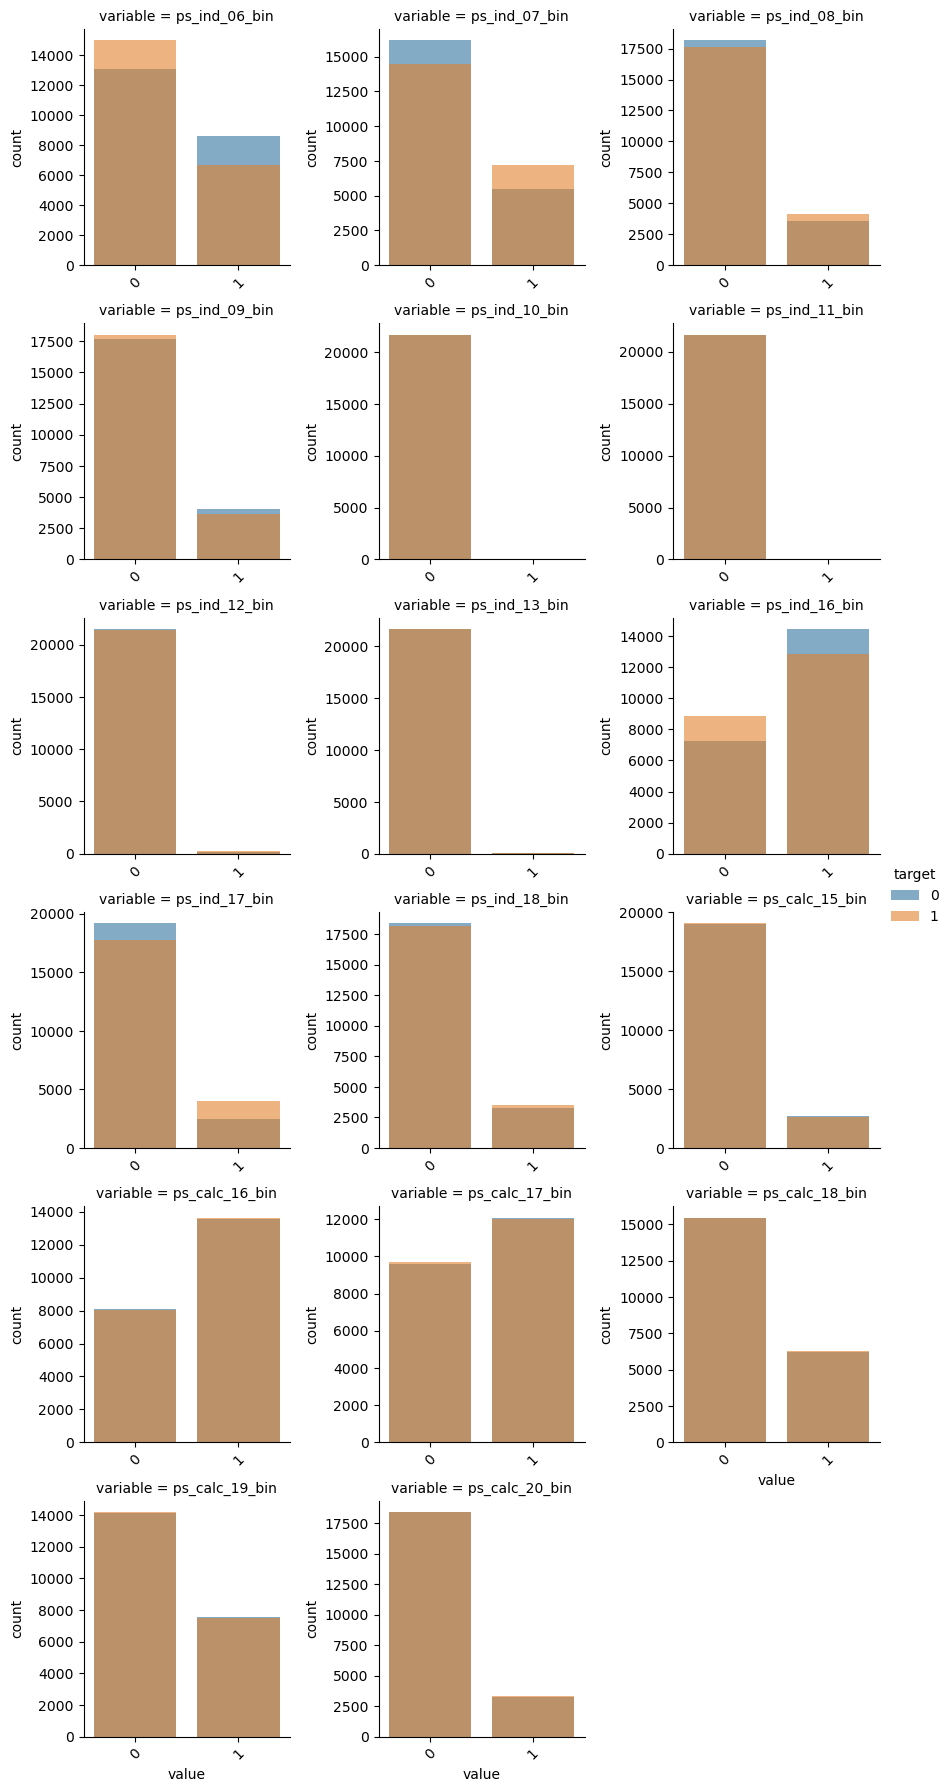

In [154]:
ViewCategoricalData(train_data, BIN_COLS)

Some binary features are extremely skewed:  ps_ind_10_bin to ps_ind_13_bin, more than 99% of the samples have a value of 0, and only 1% have a value of 1

ps_car_11_cat has 104 different classes, and the distribution is relatively long 



ps_car_01_cat and ps_car_06_cat are high cardinality  features, and the dimension will be very high if we directly do one-hot coding

For some  features, the positive and negative data almost exactly overlap

c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


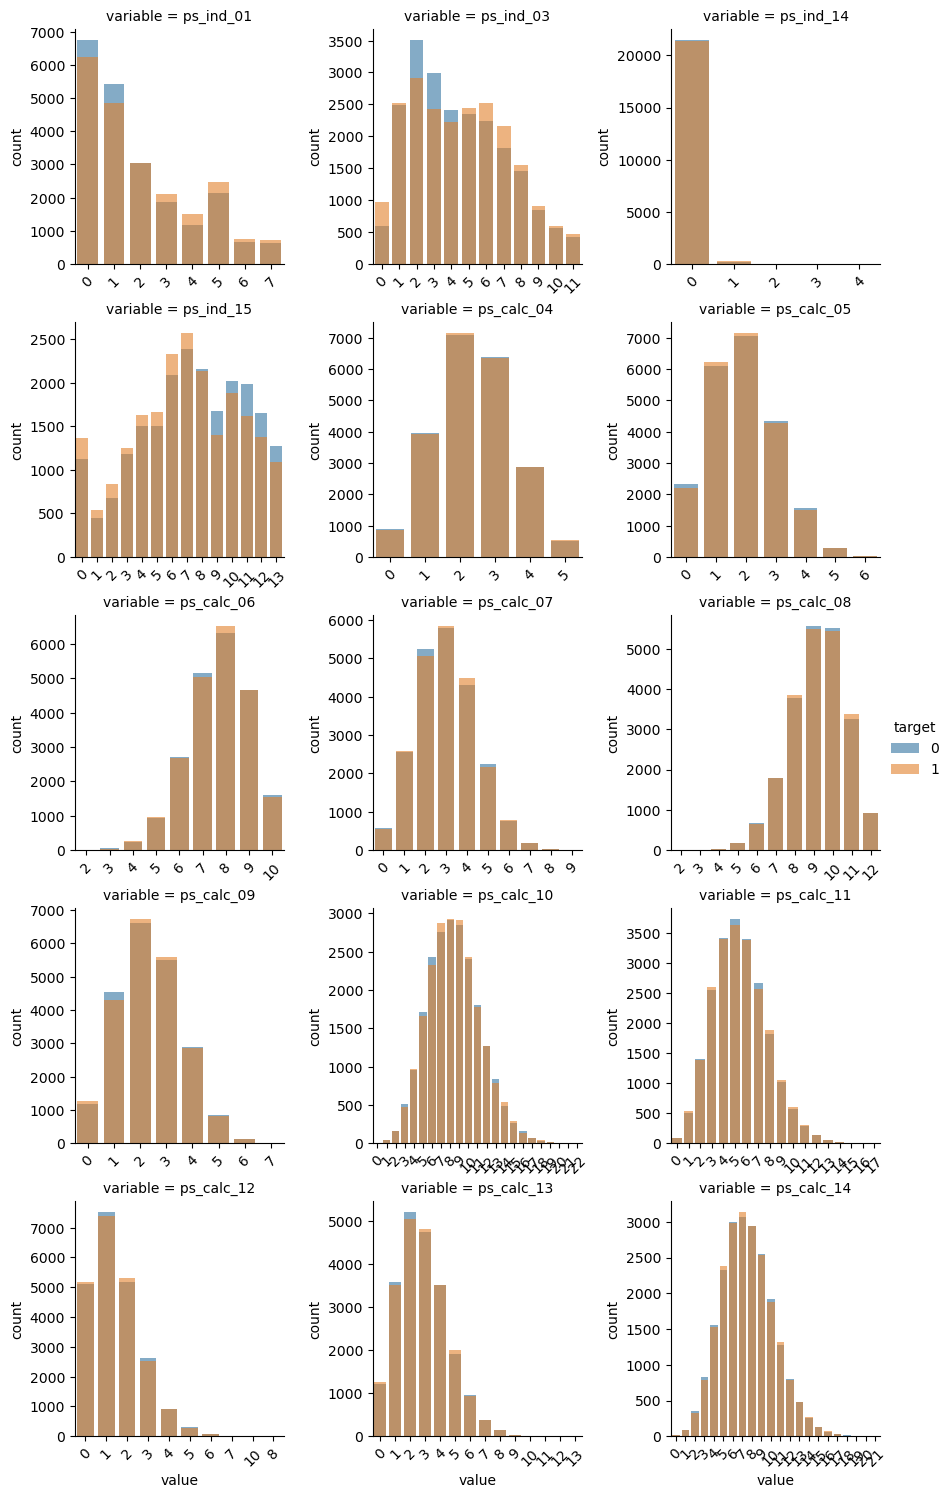

In [155]:
ViewCategoricalData(train_data, INT_COLS)

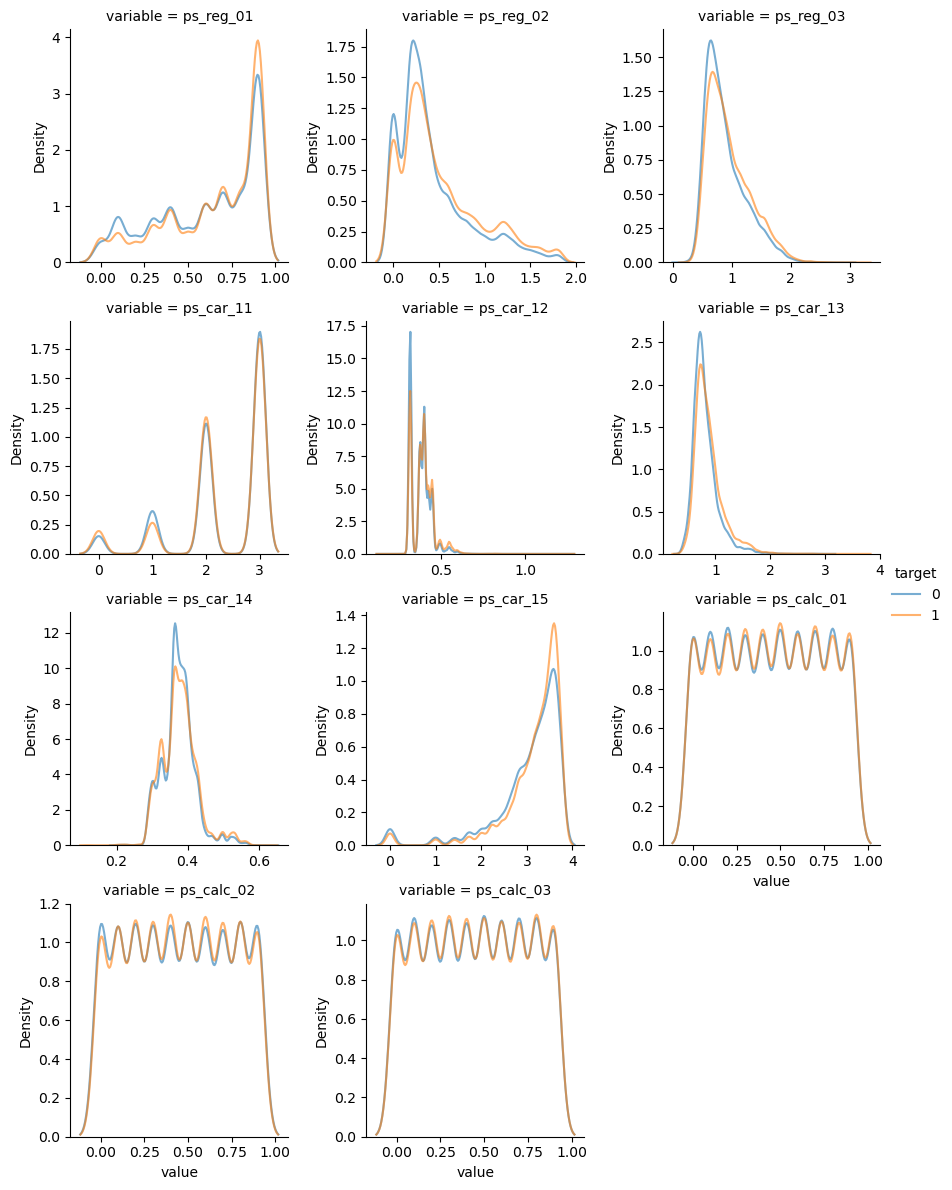

In [156]:
ViewContinuousData(train_data, FLOAT_COLS)

### Correlation analysis
Displays features that are highly correlated with the target, making the chart more concise and easy to understand

In [ ]:

# CorrDf = pd.DataFrame()
# CorrDf = train_data.corr(method='pearson', min_periods=1)


# print(CorrDf['target'].sort_values())
# high_corr_features = CorrDf['target'].abs() > 0.02
# corr_matrix_filtered = CorrDf.loc[high_corr_features, high_corr_features]

# plt.figure(figsize=(20, 10))  
# sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


# plt.title('Correlation Matrix Heatmap')
# plt.show()

### Visualize the relationship between features
The redundancy among features is not high, and the information provided by most features is relatively independent of each other

In [158]:

# c = ['ps_car_13','ps_car_12','ps_ind_17_bin','ps_reg_02','ps_car_04_cat','ps_car_07_cat','ps_ind_06_bin','ps_car_02_cat']
# sns.pairplot(train_data, vars=c, hue='target', height=2.0)
# plt.show()


TODO:
1. The missing value of -1 needs to be processed, replacing -1 with nan for a larger portion, and filling the mean for a smaller portion

| feature      |  proportion||
| --- | --- |--- |
|ps_ind_02_cat : 216 --  | 0.0004 ||
|ps_ind_04_cat : 83 -- |  0.0001||
|ps_ind_05_cat : 5809 -- | 0.0098 ||
|ps_reg_03 : 107772 --  |0.1811 |retain|
|ps_car_01_cat : 107 --  | 0.0002||
|ps_car_02_cat : 5 -- | 0.0000 ||
|ps_car_03_cat : 411231 --|0.6909 | retain |
|ps_car_05_cat : 266551 -- |0.4478 | retain |
|ps_car_07_cat : 11489 --| 0.0193 | |
|ps_car_09_cat : 569 --| 0.0010 | |
|ps_car_11 : 5 --| 0.0000 | |
|ps_car_12 : 1 --| 0.0000 | |
|ps_car_14 : 42620 -- |0.0716       | |

2. The problem of data imbalance should be considered when selecting a model

3. Remove data that is not highly correlated with target, mainly calc type


# Data Process

In [ ]:

count_0, count_1 = train_data.target.value_counts()
df_minority_over = df_minority.sample(count_0, replace=True)
train_data = pd.concat([df_majority, df_minority], axis=0)
RATIO = len(df_majority)/len(df_minority)
print('0/1 ratio is :',RATIO)

# Merge test data, unified processing
full_data = pd.concat([train_data,test_data],ignore_index=True)

0/1 ratio is : 26.43671061122891


### Missing value processing

In [ ]:


# Don't fill in data with many missing values
retainCols = ['ps_reg_03','ps_car_03_cat','ps_car_05_cat']

# replace -1 with NaN
for col in MISSING_COLS:
    full_data[col] = full_data[col].replace(-1, np.nan)
    
    
for col in retainCols:
    if col in MISSING_COLS:
        MISSING_COLS.remove(col)
        
# Missing data with high correlation
missing_pairs = [
    ('ps_ind_02_cat', 'ps_ind_04_cat'),
    ('ps_ind_02_cat', 'ps_car_01_cat'),
    ('ps_ind_04_cat', 'ps_car_01_cat'),
    ('ps_ind_05_cat', 'ps_car_07_cat'),
    ('ps_car_05_cat', 'ps_car_03_cat')
]    
for col in MISSING_COLS:   
    for pair in missing_pairs:
        col1, col2 = pair
        new_feature_name = f'pair_miss_{col1}_{col2}'
        full_data[new_feature_name] = ((full_data[col1].isnull()) & 
                                    (full_data[col2].isnull())).astype(int)
    '''
    Tests show that filling missing values affects model performance
    '''
    # if full_data[col].isnull().any():
        # if  ('cat' in col or 'bin' in col):
        #     print('mode:',train_data[col].mode()[0])
        #     full_data[col].fillna(train_data[col].mode()[0], inplace=True)
        # elif 'cat' not in col and 'bin' not in col:
        #     full_data[col].fillna(train_data[col].median(), inplace=True)
        #     print('median:',train_data[col].median())
        
        # full_data[ 'miss_'+col] = full_data[col].isnull().astype(int)
        # print('miss_'+col)

### Data Drop

In [ ]:

DROP_COLS=[]

'''
Delete all calc features
'''
# for col in train_data.columns:
#     if 'calc' in col:
#         DROP_COLS.append(col)           

part_calc=['ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin','ps_calc_04']
others = ['ps_car_10_cat','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_car_11']
DROP_COLS.extend(part_calc)
DROP_COLS.extend(others)
full_data.drop(DROP_COLS, axis=1, inplace=True)



In [162]:

def dropCols(ori_cols, drop_cols):
    return [x for x in ori_cols if x not in drop_cols]

CAT_COLS =dropCols(CAT_COLS,DROP_COLS)
BIN_COLS =dropCols(BIN_COLS,DROP_COLS)
FLOAT_COLS =dropCols(FLOAT_COLS,DROP_COLS)
INT_COLS = dropCols(INT_COLS,DROP_COLS)

### Convert to Categorical Type.

In [ ]:

for col in CAT_COLS:
    if col in full_data.columns:
        print('cat:',col)
        full_data[col] = pd.Categorical(full_data[col])

cat: ps_ind_02_cat
cat: ps_ind_04_cat
cat: ps_ind_05_cat
cat: ps_car_01_cat
cat: ps_car_02_cat
cat: ps_car_03_cat
cat: ps_car_04_cat
cat: ps_car_05_cat
cat: ps_car_06_cat
cat: ps_car_07_cat
cat: ps_car_08_cat
cat: ps_car_09_cat
cat: ps_car_11_cat


View  information of all data 

In [164]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488028 entries, 0 to 1488027
Data columns (total 50 columns):
 #   Column                                 Non-Null Count    Dtype   
---  ------                                 --------------    -----   
 0   id                                     1488028 non-null  int64   
 1   target                                 595212 non-null   float64 
 2   ps_ind_01                              1488028 non-null  int64   
 3   ps_ind_02_cat                          1487505 non-null  category
 4   ps_ind_03                              1488028 non-null  int64   
 5   ps_ind_04_cat                          1487800 non-null  category
 6   ps_ind_05_cat                          1473509 non-null  category
 7   ps_ind_06_bin                          1488028 non-null  int64   
 8   ps_ind_07_bin                          1488028 non-null  int64   
 9   ps_ind_08_bin                          1488028 non-null  int64   
 10  ps_ind_09_bin                 

### Data Split

In [ ]:

from sklearn.model_selection import train_test_split

target_column = 'target'
if target_column in full_data.columns:
    train_data = full_data[pd.notnull(full_data[target_column])].reset_index(drop=True)
    print(train_data.shape)
    test_data = full_data[full_data[target_column].isnull()].drop(columns=[target_column]).reset_index(drop=True)




(595212, 50)


In [166]:
X = train_data.drop(['target', 'id'], axis=1) 
Y = train_data['target']           
test_ids = test_data['id']
test_data = test_data.drop(['id'], axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42) 

### Normalized data

In [167]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[FLOAT_COLS]=scaler.fit_transform(X_train[FLOAT_COLS])
X_val[FLOAT_COLS] = scaler.transform(X_val[FLOAT_COLS])
test_data[FLOAT_COLS] = scaler.transform(test_data[FLOAT_COLS])

In [168]:
print(X_train.shape)
X_train.head()

(476169, 48)


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,pair_miss_ps_ind_02_cat_ps_ind_04_cat,pair_miss_ps_ind_02_cat_ps_car_01_cat,pair_miss_ps_ind_04_cat_ps_car_01_cat,pair_miss_ps_ind_05_cat_ps_car_07_cat,pair_miss_ps_car_05_cat_ps_car_03_cat
39028,4,1.0,7,0.0,0.0,0,0,1,0,8,1,0,0,0.444444,0.111111,0.141640,11.0,0.0,NaN,0,NaN,10,1.0,1,2.0,83,0.278360,0.186074,0.586549,0.755929,0.222222,0.000000,0.333333,1,9,1,11,2,8,2,0,0,9,0,0,0,0,1
478420,2,2.0,3,0.0,0.0,0,0,0,1,8,0,1,0,1.000000,0.388889,0.281473,11.0,0.0,1.0,0,0.0,6,1.0,0,2.0,104,0.257530,0.288132,0.482984,0.963624,0.777778,0.666667,0.222222,3,8,1,10,3,6,5,0,6,9,0,0,0,0,0
547268,7,1.0,5,1.0,0.0,0,1,0,0,4,0,0,1,1.000000,0.222222,0.157225,10.0,1.0,NaN,0,1.0,11,1.0,1,0.0,30,0.297868,0.180449,0.641979,0.845154,0.222222,0.111111,0.555556,1,8,3,11,3,4,6,1,2,1,0,0,0,0,0
388290,5,1.0,7,0.0,0.0,1,0,0,0,9,1,0,0,0.888889,0.611111,0.272964,11.0,1.0,0.0,0,1.0,1,1.0,1,2.0,74,0.255378,0.059578,NaN,0.000000,1.000000,0.555556,0.777778,3,10,3,8,3,9,10,1,2,7,0,0,0,0,0
63342,7,1.0,6,1.0,0.0,0,1,0,0,4,1,0,0,0.777778,0.166667,NaN,4.0,1.0,NaN,0,0.0,6,1.0,1,0.0,104,0.257530,0.155364,NaN,0.845154,0.000000,0.333333,0.777778,3,10,4,11,2,4,9,3,2,7,0,0,0,0,0


In [169]:
print(test_data.shape)
test_data.head()

(892816, 48)


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,pair_miss_ps_ind_02_cat_ps_ind_04_cat,pair_miss_ps_ind_02_cat_ps_car_01_cat,pair_miss_ps_ind_04_cat_ps_car_01_cat,pair_miss_ps_ind_05_cat_ps_car_07_cat,pair_miss_ps_car_05_cat_ps_car_03_cat
0,0,1.0,8,1.0,0.0,0,1,0,0,12,1,0,0,0.555556,0.166667,0.138077,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,65,0.185617,0.120731,0.460456,0.925820,0.111111,0.888889,0.666667,1,6,3,6,2,9,1,1,1,12,0,0,0,0,1
1,4,2.0,5,1.0,0.0,0,0,0,1,5,1,0,0,1.000000,0.277778,0.178571,4.0,1.0,NaN,0,0.0,11,1.0,1,0.0,103,0.185617,0.102507,0.472211,0.755929,0.444444,0.555556,0.444444,3,8,4,10,2,7,2,0,3,10,0,0,0,0,0
2,5,1.0,3,0.0,0.0,0,0,0,1,10,0,0,0,0.444444,0.000000,0.214986,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,29,0.257530,0.186057,0.548452,0.886405,0.666667,0.666667,0.666667,3,7,4,6,3,12,4,0,2,4,0,0,0,0,1
3,0,1.0,6,0.0,0.0,1,0,0,0,4,1,0,0,0.111111,0.111111,NaN,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,40,0.235353,0.115703,0.516085,0.654654,0.111111,0.555556,0.555556,1,7,3,12,1,13,5,1,0,5,0,0,0,0,1
4,5,1.0,7,0.0,0.0,0,0,0,1,4,1,0,0,1.000000,0.222222,0.190241,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,101,0.235353,0.162044,0.523018,0.886405,1.000000,0.666667,0.888889,4,7,1,10,4,12,4,0,0,4,0,0,0,0,1


# Model

Since this is a binary problem with unbalanced data, we chose to use both XGBoost and LightGBM models for training. These two Gradient Boosting Decision Trees (GBDT) algorithms are widely used in various machine learning tasks due to their excellent performance and flexibility.



Both XGBoost and LightGBM are well-suited for handling imbalanced datasets. They can improve model performance on minority classes by adjusting class weights, using appropriate evaluation metrics (such as AUC-ROC or F1 score), and applying sampling techniques (e.g., undersampling or oversampling).

https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

In [ ]:

from sklearn.model_selection import RandomizedSearchCV 
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete calculation is (1 - frac_pos) / 2.

The Normalized Gini Coefficient adjusts the score by the theoretical maximum so that the maximum score is 1.

In [171]:

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

def gini(actual, pred):
    assert len(actual) == len(pred)
    all_data = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float64)
    sort_order = np.lexsort((all_data[:,2], -1 * all_data[:,1]))
    all_data = all_data[sort_order]
    total_losses = all_data[:,0].sum()
    gini_sum = all_data[:,0].cumsum().sum() / total_losses
    gini_sum -= (len(actual) + 1) / 2.0
    return gini_sum / len(actual)

def normalized_gini(actual, pred):
    return gini(actual, pred) / gini(actual, actual)
    
    
gini_scorer = make_scorer(normalized_gini, greater_is_better=True)





In [193]:




# 定义模型
xgb_model = XGBClassifier(
    objective='binary:logistic',  # 二分类任务
    enable_categorical=True, 
    random_state=42,             # 固定随机种子

)

# 定义超参数网格
param_grid = {
    'n_estimators': [100,300, 500,800],          # 树的数量
    'max_depth': [3,5,10,15],                  # 树的最大深度
    'learning_rate': [0.01,0.02,0.05],      # 学习率
    'min_child_weight': [5, 10],
    'gamma': [0.5, 1, 2],
    'subsample': [ 0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [RATIO]              # 正负样本权重比（根据你的数 据设置）
}



random_search  = RandomizedSearchCV (
    estimator=xgb_model,
    param_distributions=param_grid, 
    scoring=gini_scorer,
    n_iter=50,                    
    cv=3,  # 交叉验证折数
    verbose=1,
    n_jobs=-1  # 并行计算
)


random_search.fit(X_train, Y_train)


print("最佳参数:", random_search.best_params_)
print("最佳验证集 AUC:", random_search.best_score_)

# 使用最佳模型进行预测
best_model = random_search.best_estimator_
y_pred_rf = best_model.predict_proba(X_val)[:, 1]



print("XGBoost 验证集 AUC:", roc_auc_score(Y_val, y_pred_rf))
print("XGBoost 验证集 gini:", normalized_gini(Y_val, y_pred_rf))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(n_estimators=500, max_depth=15, learning_rate=0.1,
#                           subsample=0.8,colsample_bytree=0.8,
#                           min_child_weight=5, gamma=0.5,
#                           scale_pos_weight=RATIO,
#                           objective='binary:logistic',  eval_metric='auc',
#                           enable_categorical=True, random_state=42, n_jobs=-1)
# xgb_model.fit(
#     X_train, 
#     Y_train, 
#     eval_set=[(X_val, Y_val)], 
#     verbose=0)
# # 预测验证集并计算AUC
# y_pred_rf = xgb_model.predict_proba(X_val)[:,1]

# print("XGBoost 验证集 AUC:", roc_auc_score(Y_val, y_pred_rf))
# print("XGBoost 验证集 gini:", normalized_gini(Y_val, y_pred_rf))   

In [ ]:


# 定义模型
lgb_model = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=0,
)

# 指定分类特征列索引
cat_feat_indices = [X_train.columns.get_loc(c) for c in CAT_COLS if c in X_train.columns]

# 定义参数网格
param_grid = {
    'n_estimators': [100,300,500,800],
    'learning_rate': [0.01,0.02, 0.05],
    'num_leaves': [4,8,16, 32],
    'max_depth': [5,10,20,30],
    'subsample': [ 0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0.1,0.2],
    'reg_lambda': [0.1,0.2],
    'scale_pos_weight': [RATIO], 
}



rand_search = RandomizedSearchCV (
    estimator=lgb_model,
    param_distributions=param_grid,
    scoring=gini_scorer,
    n_iter=100,  
    cv=3,        
    verbose=0
 
)

# 拟合模型
rand_search.fit(
    X_train,
    Y_train,
    eval_set=[(X_val, Y_val)],
    # eval_metric='auc',
    categorical_feature=cat_feat_indices,
    # callbacks=[lgb.early_stopping(stopping_rounds=100)], 
    feature_name='auto',  
  
)

# 输出最佳参数和得分
print("最佳参数:", rand_search.best_params_)
print("最佳验证集 :", rand_search.best_score_)

# 使用最佳模型进行预测
best_model = rand_search.best_estimator_
y_pred_rf = best_model.predict_proba(X_val)[:, 1]

# 计算验证集的 AUC 和 gini
print(y_pred_rf)
print("LightGBM 验证集 AUC:", roc_auc_score(Y_val, y_pred_rf))
print("LightGBM 验证集 gini:", normalized_gini(Y_val, y_pred_rf))

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [190]:


lgb_model = LGBMClassifier(n_estimators=800, learning_rate=0.01,
                           num_leaves=8, max_depth=5,
                           subsample=0.8, colsample_bytree=0.8,
                           reg_alpha=0.1, reg_lambda=0.1,
                           scale_pos_weight=RATIO,
                           random_state=42, n_jobs=-1,verbose=0)
# 指定分类特征列索引
cat_feat_indices = [X_train.columns.get_loc(c) for c in CAT_COLS if c in X_train.columns] 
lgb_model.fit(
    X_train, 
    Y_train, 
    eval_set=[(X_val, Y_val)], 
    eval_metric='auc',
    # callbacks=[lgb.early_stopping(stopping_rounds=500)],  
    categorical_feature=cat_feat_indices, 
    feature_name='auto'
     
)
y_pred_rf = lgb_model.predict_proba(X_val)[:, 1]

print("LightGBM 验证集 AUC:", roc_auc_score(Y_val, y_pred_rf))
print("LightGBM 验证集 gini:", normalized_gini(Y_val, y_pred_rf))


LightGBM 验证集 AUC: 0.6286398427955405
LightGBM 验证集 gini: 0.25727968361037373


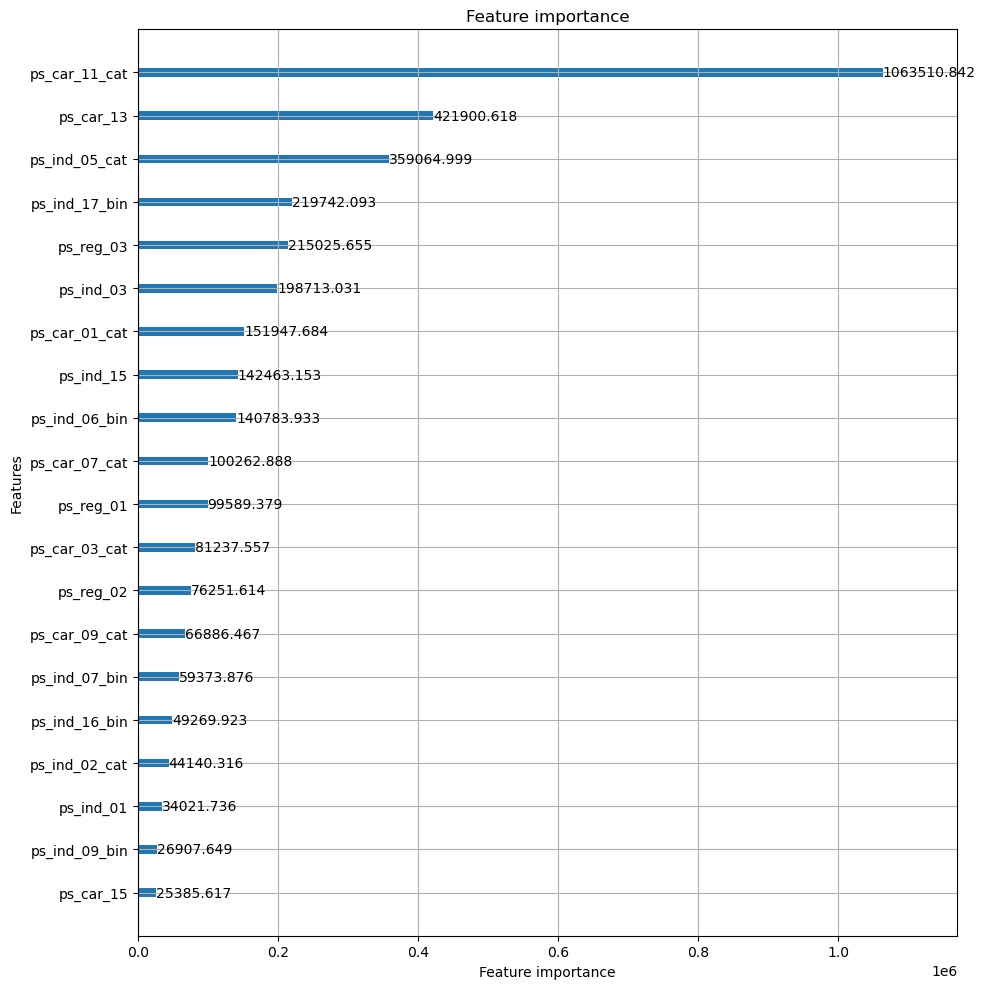

In [191]:
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain', figsize=(10, 10))
plt.tight_layout()
plt.show()


In [177]:
test_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,pair_miss_ps_ind_02_cat_ps_ind_04_cat,pair_miss_ps_ind_02_cat_ps_car_01_cat,pair_miss_ps_ind_04_cat_ps_car_01_cat,pair_miss_ps_ind_05_cat_ps_car_07_cat,pair_miss_ps_car_05_cat_ps_car_03_cat
0,0,1.0,8,1.0,0.0,0,1,0,0,12,1,0,0,0.555556,0.166667,0.138077,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,65,0.185617,0.120731,0.460456,0.925820,0.111111,0.888889,0.666667,1,6,3,6,2,9,1,1,1,12,0,0,0,0,1
1,4,2.0,5,1.0,0.0,0,0,0,1,5,1,0,0,1.000000,0.277778,0.178571,4.0,1.0,NaN,0,0.0,11,1.0,1,0.0,103,0.185617,0.102507,0.472211,0.755929,0.444444,0.555556,0.444444,3,8,4,10,2,7,2,0,3,10,0,0,0,0,0
2,5,1.0,3,0.0,0.0,0,0,0,1,10,0,0,0,0.444444,0.000000,0.214986,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,29,0.257530,0.186057,0.548452,0.886405,0.666667,0.666667,0.666667,3,7,4,6,3,12,4,0,2,4,0,0,0,0,1
3,0,1.0,6,0.0,0.0,1,0,0,0,4,1,0,0,0.111111,0.111111,NaN,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,40,0.235353,0.115703,0.516085,0.654654,0.111111,0.555556,0.555556,1,7,3,12,1,13,5,1,0,5,0,0,0,0,1
4,5,1.0,7,0.0,0.0,0,0,0,1,4,1,0,0,1.000000,0.222222,0.190241,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,101,0.235353,0.162044,0.523018,0.886405,1.000000,0.666667,0.888889,4,7,1,10,4,12,4,0,0,4,0,0,0,0,1


In [192]:
def save_data(y_pred,filename):
    submission=pd.DataFrame ( {
    "id" : test_ids,
    "target" : y_pred
    })
    submission.to_csv ( filename+'_result.csv',index=False)

y_pred_rf = lgb_model.predict_proba(test_data)[:, 1] 
threshold = 0.5  # 阈值
y_pred_class = (y_pred_rf>threshold).astype(int)  # 将概率转换为类别标签
count_of_ones = y_pred_class.sum()  
print("预测为1的数量:", count_of_ones)
save_data(y_pred_rf,'random')
# 评估

预测为1的数量: 335560
